# Predicting Student Exam Scores Based on Lifestyle and Academic Habits

Import the dataset with 15 features and 1000 instances. We dropped the first feature which is student_id because its unnecessary and it would cause issues down the road.

In [ ]:
#https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance
#kaggle link of the dataset

import pandas as pd
data = pd.read_csv('student_habits_performance.csv')
data = data.drop(['student_id'], axis=1) #unnecesary/irrelevant feature
data.tail()


,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
995,21,Female,2.6,0.5,1.6,No,77.0,7.5,Fair,2,High School,Good,6,Yes,76.1
996,17,Female,2.9,1.0,2.4,Yes,86.0,6.8,Poor,1,High School,Average,6,Yes,65.9
997,20,Male,3.0,2.6,1.3,No,61.9,6.5,Good,5,Bachelor,Good,9,Yes,64.4
998,24,Male,5.4,4.1,1.1,Yes,100.0,7.6,Fair,0,Bachelor,Average,1,No,69.7
999,19,Female,4.3,2.9,1.9,No,89.4,7.1,Good,2,Bachelor,Average,8,No,74.9


We check the type of all features and how many non-null values they have. This is important to see because we may need to handle missing values and encode some of the features.  

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1000 non-null   int64  
 1   gender                         1000 non-null   object 
 2   study_hours_per_day            1000 non-null   float64
 3   social_media_hours             1000 non-null   float64
 4   netflix_hours                  1000 non-null   float64
 5   part_time_job                  1000 non-null   object 
 6   attendance_percentage          1000 non-null   float64
 7   sleep_hours                    1000 non-null   float64
 8   diet_quality                   1000 non-null   object 
 9   exercise_frequency             1000 non-null   int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               1000 non-null   object 
 12  mental_health_rating           1000 non-null   in

Checking unique values of categorical features to encode them correctly

In [3]:
print(data['gender'].unique())
print(data['part_time_job'].unique())
print(data['diet_quality'].unique())
print(data['parental_education_level'].unique())
print(data['internet_quality'].unique())
print(data['extracurricular_participation'].unique())

['Female' 'Male' 'Other']
['No' 'Yes']
['Fair' 'Good' 'Poor']
['Master' 'High School' 'Bachelor' nan]
['Average' 'Poor' 'Good']
['Yes' 'No']


Encoding the features with correct maps

In [4]:
from sklearn.preprocessing import LabelEncoder

encoded_data = data.copy()

for col in ['part_time_job', 'extracurricular_participation']:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col])


diet_map = {'Poor': 0, 'Fair': 1, 'Good': 2}
internet_map = {'Poor': 0, 'Average': 1, 'Good': 2}
education_map = {'High School': 0, 'Bachelor': 1, 'Master': 2}

encoded_data['diet_quality'] = encoded_data['diet_quality'].map(diet_map)
encoded_data['internet_quality'] = encoded_data['internet_quality'].map(internet_map)
encoded_data['parental_education_level'] = encoded_data['parental_education_level'].map(education_map)

gender_map = {'Other': 0, 'Female': 1, 'Male': 2}
encoded_data['gender'] = encoded_data['gender'].map(gender_map)

data = encoded_data
data

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,23,1,0.0,1.2,1.1,0,85.0,8.0,1,6,2.0,1,8,1,56.2
1,20,1,6.9,2.8,2.3,0,97.3,4.6,2,6,0.0,1,8,0,100.0
2,21,2,1.4,3.1,1.3,0,94.8,8.0,0,1,0.0,0,1,0,34.3
3,23,1,1.0,3.9,1.0,0,71.0,9.2,0,4,2.0,2,1,1,26.8
4,19,1,5.0,4.4,0.5,0,90.9,4.9,1,3,2.0,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,21,1,2.6,0.5,1.6,0,77.0,7.5,1,2,0.0,2,6,1,76.1
996,17,1,2.9,1.0,2.4,1,86.0,6.8,0,1,0.0,1,6,1,65.9
997,20,2,3.0,2.6,1.3,0,61.9,6.5,2,5,1.0,2,9,1,64.4
998,24,2,5.4,4.1,1.1,1,100.0,7.6,1,0,1.0,1,1,0,69.7


We see that one feature has 91 missing values

In [5]:
missing_counts = data.isnull().sum()
missing_counts[missing_counts > 0]


parental_education_level    91
dtype: int64

Missing values in parental_education_level were filled by randomly picking values according to the existing feature percentages to keep the balance.

In [6]:
import numpy as np
probs = data['parental_education_level'].value_counts(normalize=True)

# filling missing values randomly according to distribution
missing_idx = data[data['parental_education_level'].isnull()].index
imputed_vals = np.random.choice(probs.index, size=len(missing_idx), p=probs.values)
data.loc[missing_idx, 'parental_education_level'] = imputed_vals


In [7]:
data.isnull().sum()

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

Descriptive statistics of the data

In [8]:
data.describe()

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000.0000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,1.435000,3.55010,2.505500,1.819700,0.215000,84.131700,6.470100,1.19300,3.042000,0.754000,1.285000,5.438000,0.318000,69.601500
std,2.3081,0.574548,1.46889,1.172422,1.075118,0.411028,9.399246,1.226377,0.72545,2.025423,0.741643,0.726845,2.847501,0.465932,16.888564
min,17.0000,0.000000,0.00000,0.000000,0.000000,0.000000,56.000000,3.200000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,18.400000
25%,18.7500,1.000000,2.60000,1.700000,1.000000,0.000000,78.000000,5.600000,1.00000,1.000000,0.000000,1.000000,3.000000,0.000000,58.475000
50%,20.0000,1.000000,3.50000,2.500000,1.800000,0.000000,84.400000,6.500000,1.00000,3.000000,1.000000,1.000000,5.000000,0.000000,70.500000
75%,23.0000,2.000000,4.50000,3.300000,2.525000,0.000000,91.025000,7.300000,2.00000,5.000000,1.000000,2.000000,8.000000,1.000000,81.325000
max,24.0000,2.000000,8.30000,7.200000,5.400000,1.000000,100.000000,10.000000,2.00000,6.000000,2.000000,2.000000,10.000000,1.000000,100.000000


We created new features to represent free time hours, distraction hours, and a wellness score combining sleep, diet, and exercise habits.


In [9]:
#feature extraction

data['free_time_hours'] = 24 - (data['study_hours_per_day'] + data['sleep_hours'] + data['part_time_job']*4)
data['free_time_hours'] = data['free_time_hours'].clip(lower=0) #no negative free time :')

data['distraction_hours'] = data['social_media_hours'] + data['netflix_hours']
data['wellness_score'] = (data['sleep_hours'] / 8) + data['diet_quality'] + data['exercise_frequency']

data.drop(columns = ['social_media_hours', 'netflix_hours', 'exercise_frequency'], inplace = True)

Divided the data into features and target class.

In [10]:
X = data.drop(columns = ["exam_score"], axis = 1)
y= data["exam_score"]

Plot of the distribution of the target class

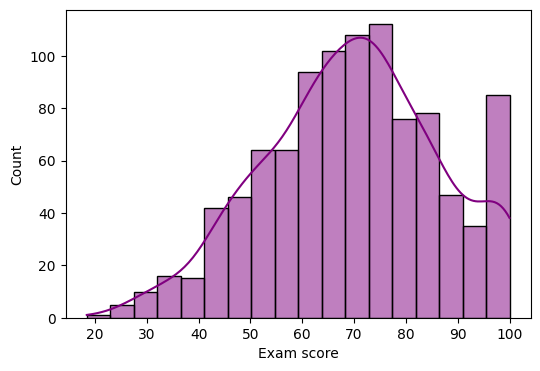

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True, color="purple")
#plt.title("Distribution of the target class")
plt.xlabel("Exam score")
plt.ylabel("Count")
plt.show()



Range of values of all features to see which might need scaling.

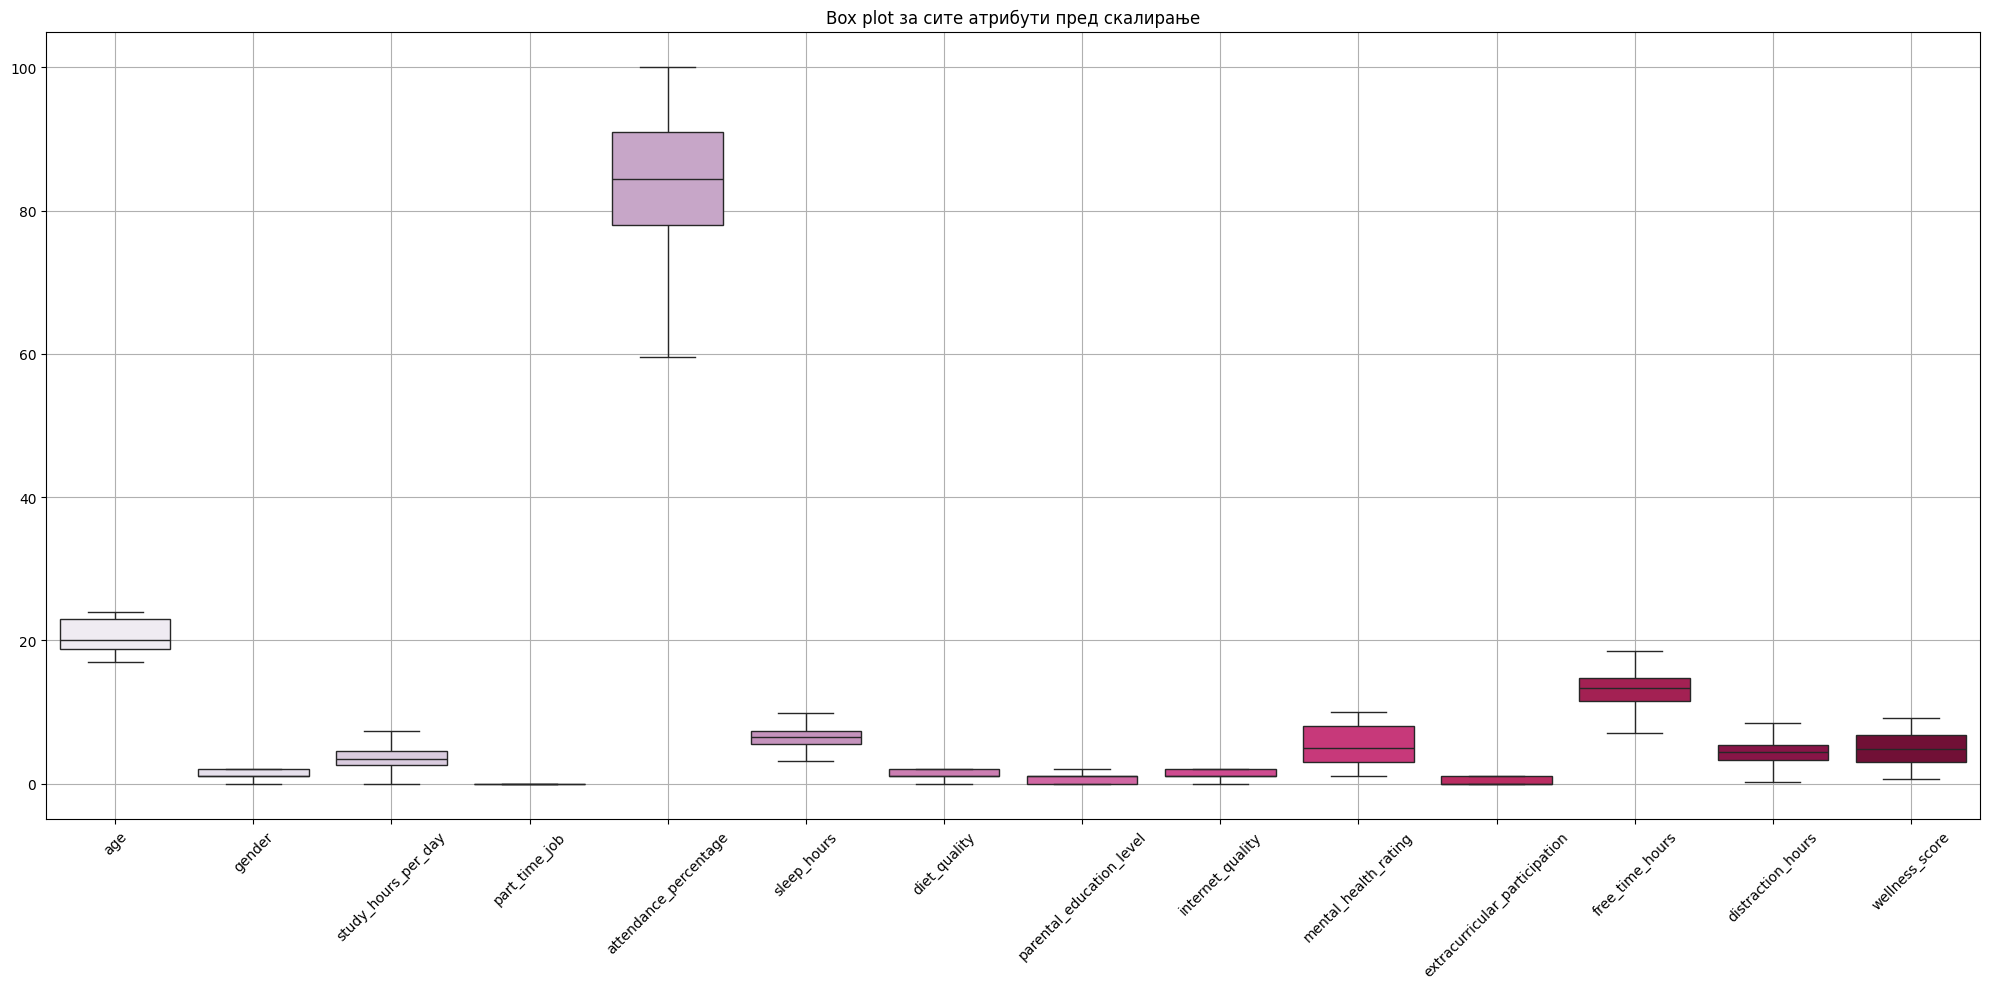

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(data=X, palette="PuRd", showfliers=False)
plt.title("Box plot за сите атрибути пред скалирање") #pred standardizacija 
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

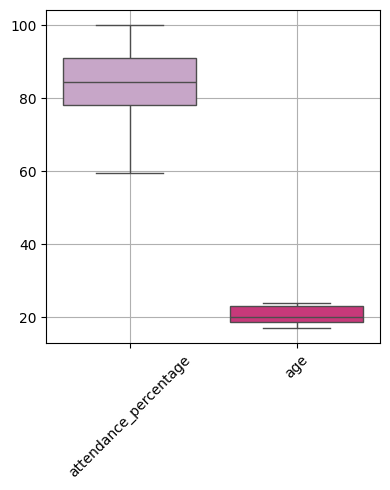

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 5))
sns.boxplot(data=data[["attendance_percentage", "age"]], palette="PuRd", showfliers=False)
#plt.title("Box plot of attendance percentage and age before scaling") 
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [
    'attendance_percentage', 'age', 'free_time_hours', 'distraction_hours',
    'sleep_hours', 'wellness_score', 'study_hours_per_day', 'mental_health_rating'
]

scaler = StandardScaler()
X[features_to_scale] = scaler.fit_transform(X[features_to_scale])



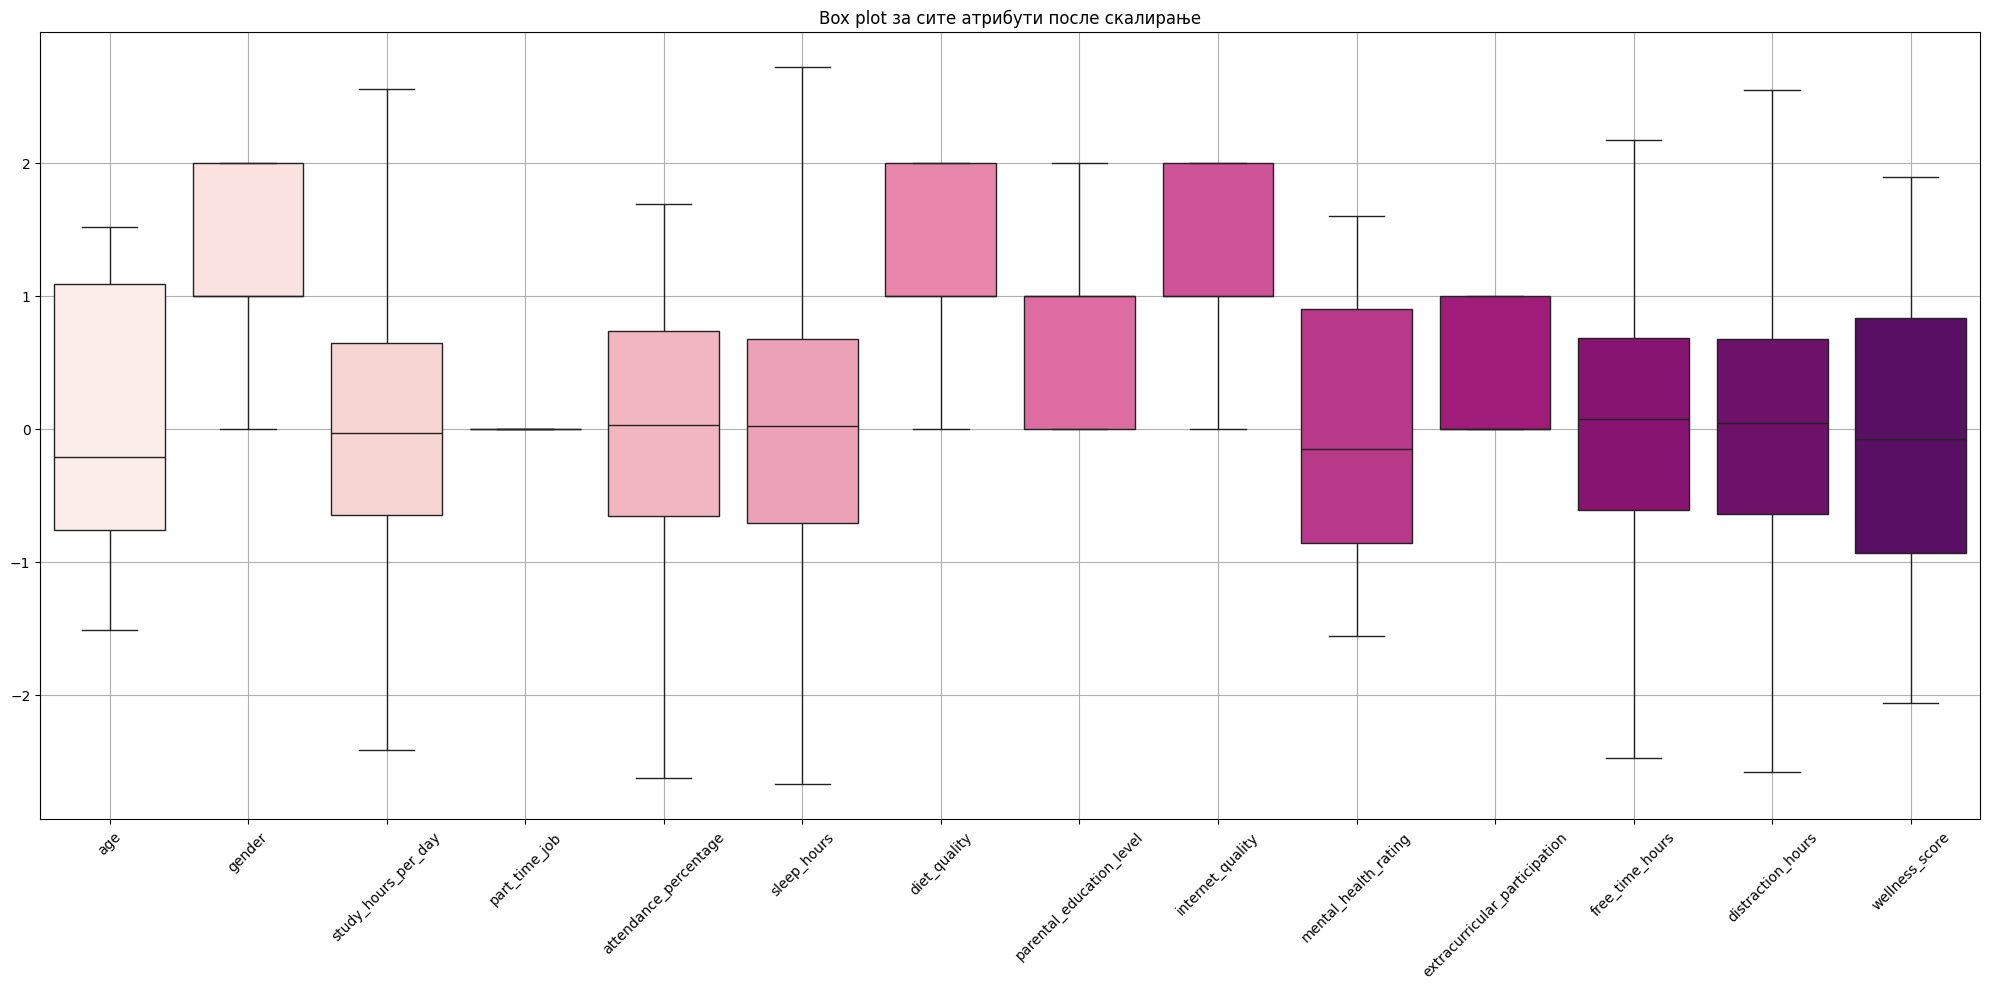

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.boxplot(data=X, palette="RdPu", showfliers=False)
plt.title("Box plot за сите атрибути после скалирање") #posle standardizacija 
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Correlation matrix.

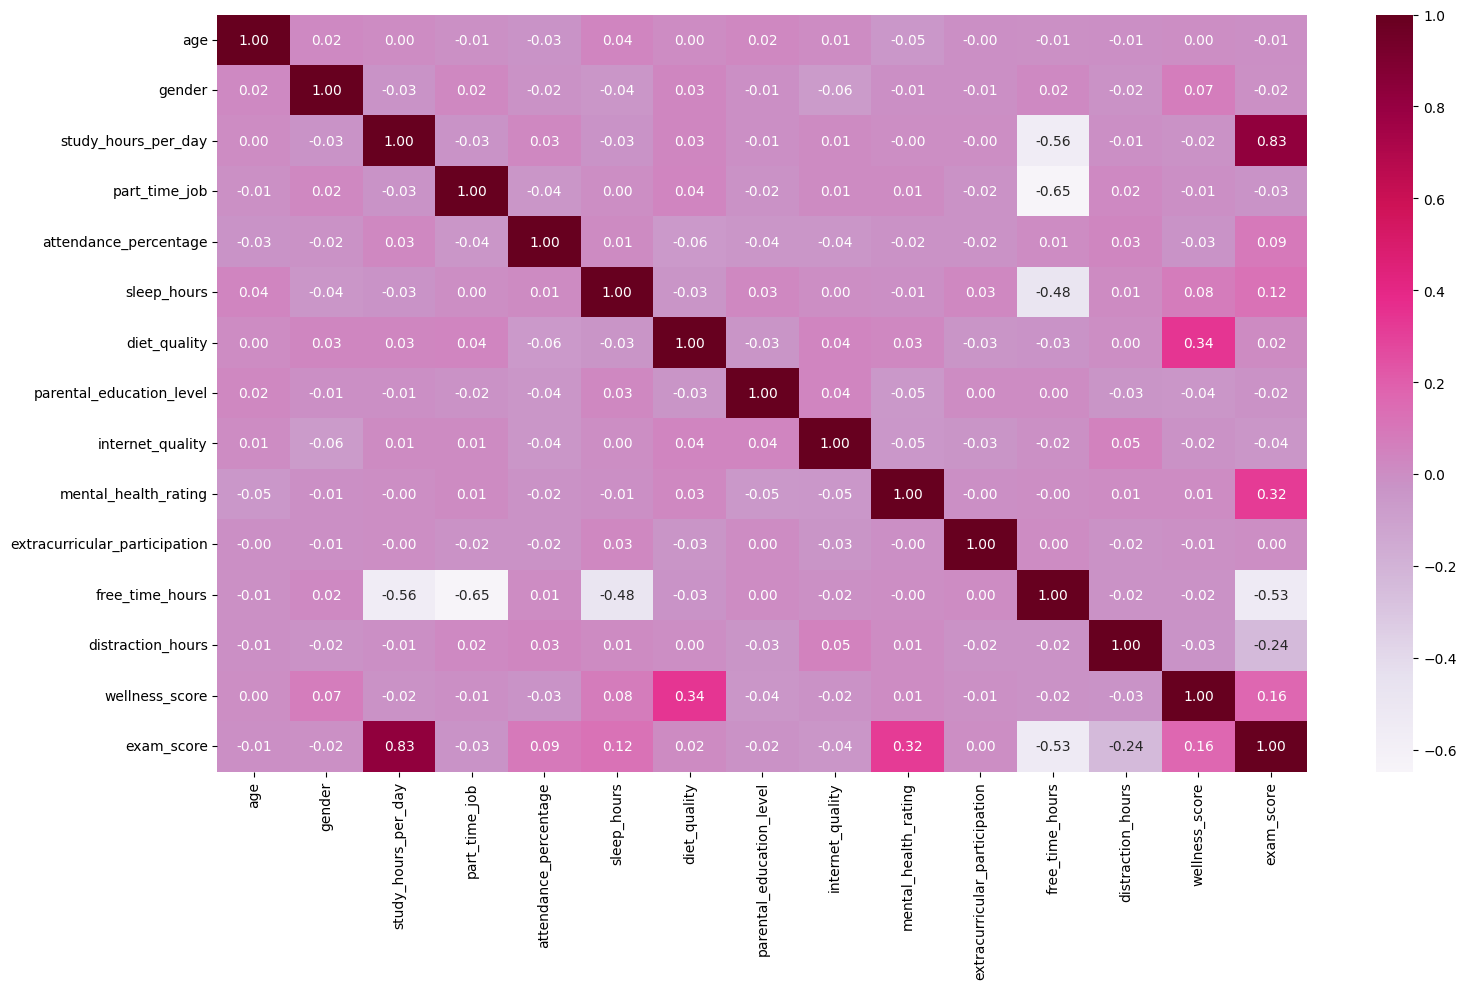

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.corr(numeric_only=True)

cols = list(corr_matrix.columns)

cols.remove('exam_score')
cols.append('exam_score') #za da bide target na kraj

corr_matrix = corr_matrix.loc[cols, cols]

plt.figure(figsize=(16, 10))

heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='PuRd')
plt.tight_layout()
plt.show()


Scatter plot with the most correlated feature.

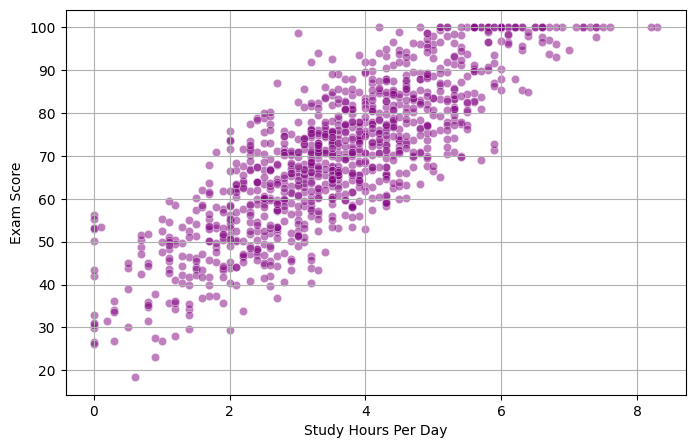

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))
sns.scatterplot(x='study_hours_per_day', y='exam_score', data=data, alpha=0.5, color='Purple')
#plt.title('Exam Score vs. Study Hours Per Day')
plt.xlabel('Study Hours Per Day')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()


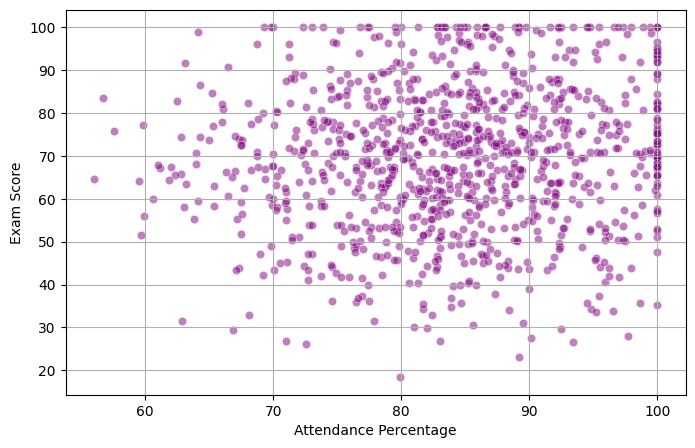

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 5))
sns.scatterplot(x='attendance_percentage', y='exam_score', data=data, alpha=0.5, color='Purple')
#plt.title('Exam Score vs. Attendance Percentage')
plt.xlabel('Attendance Percentage')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\1199319781.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='mental_health_rating', y='exam_score', data=data, palette="PuRd")


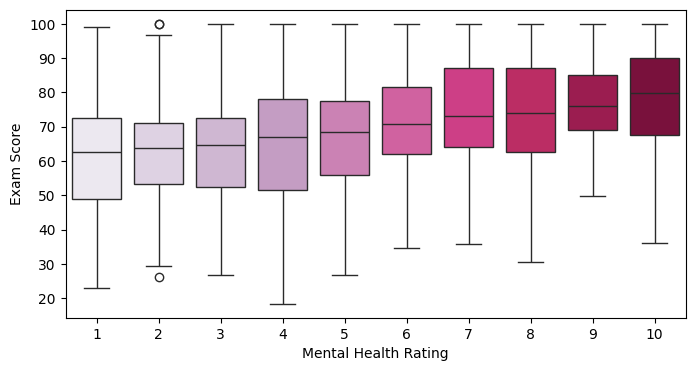

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x='mental_health_rating', y='exam_score', data=data, palette="PuRd") 

#plt.title('Exam Score Distribution by Mental Health Rating')
plt.xlabel('Mental Health Rating')
plt.ylabel('Exam Score')

plt.show()


C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\158849568.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='gender', y='exam_score', palette='RdPu')


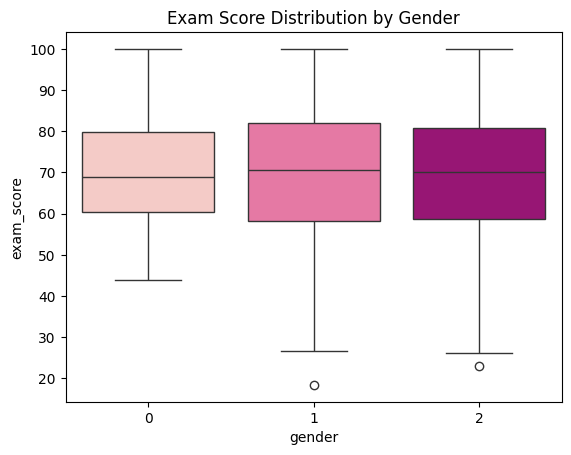

In [20]:
sns.boxplot(data=data, x='gender', y='exam_score', palette='RdPu')
plt.title('Exam Score Distribution by Gender')
plt.show()
#gender_map = {'Other': 0, 'Female': 1, 'Male': 2}
#in conclusion, the gender has no distinct effect on the exam score 

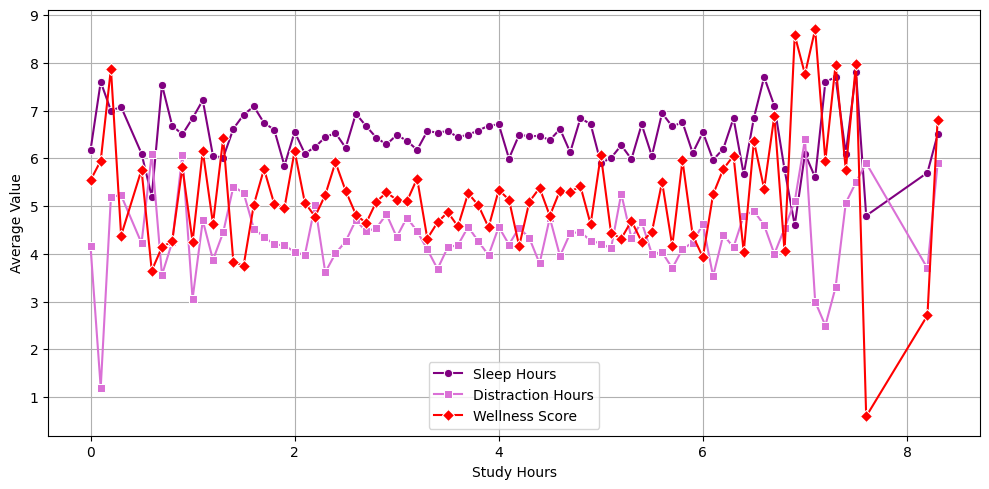

In [21]:
grouped = data.groupby('study_hours_per_day')[['sleep_hours', 'distraction_hours', 'wellness_score']].mean().reset_index()

plt.figure(figsize=(10, 5))

sns.lineplot(data=grouped, x='study_hours_per_day', y='sleep_hours', label='Sleep Hours', marker='o', color='purple')
sns.lineplot(data=grouped, x='study_hours_per_day', y='distraction_hours', label='Distraction Hours', marker='s', color='orchid')
sns.lineplot(data=grouped, x='study_hours_per_day', y='wellness_score', label='Wellness Score', marker='D', color='red')

plt.xlabel('Study Hours')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


1. 80/20 split of the data, training 12 models with no feature selection and no hyperparameter tuning

C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\2889272901.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


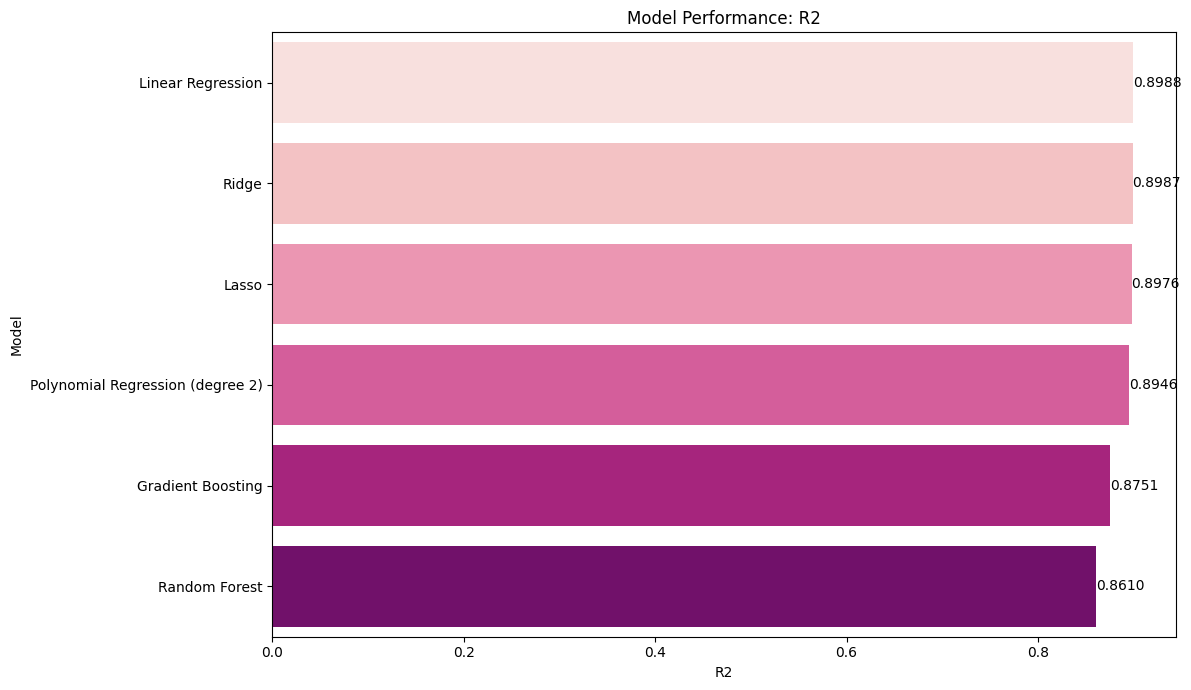

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,4.156600,25.957732,5.094873,0.898772
1,Ridge,4.159674,25.979774,5.097036,0.898686
2,Lasso,4.177284,26.254881,5.123952,0.897613
5,Polynomial Regression (degree 2),4.167764,27.022859,5.198352,0.894619
4,Gradient Boosting,4.703004,32.023535,5.658934,0.875117
3,Random Forest,4.874055,35.649147,5.970691,0.860979


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#80/20 shows better results

models = {
    #"Dummy": DummyRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(0.1),
    #"Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    #"AdaBoost": AdaBoostRegressor(random_state=42),
    #"XGBoost": XGBRegressor(random_state=42),
    #"SVR": SVR(),
    #"KNN": KNeighborsRegressor(),
    "Polynomial Regression (degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    #"Polynomial Regression (degree 3)": make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "RMSE": [],
    "R2": []
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results["Model"].append(name)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["R2"].append(r2)

results_all_no_tuning = pd.DataFrame(results)

metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False # r2 is better higher, so sort descending
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_all_no_tuning.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7)) 
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center')

    plt.tight_layout()
    plt.show()

results_all_no_tuning.sort_values(by="R2", ascending=False) 

Feature selection - we experimented around with different numbers/models, but the best results were given with Random Forest as a model and 9 features to select (it makes sense since total theres 14 features).

Selected features (9):
['age', 'study_hours_per_day', 'attendance_percentage', 'sleep_hours', 'diet_quality', 'mental_health_rating', 'free_time_hours', 'distraction_hours', 'wellness_score']


C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\3588255009.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=ranking_df, palette='RdPu')


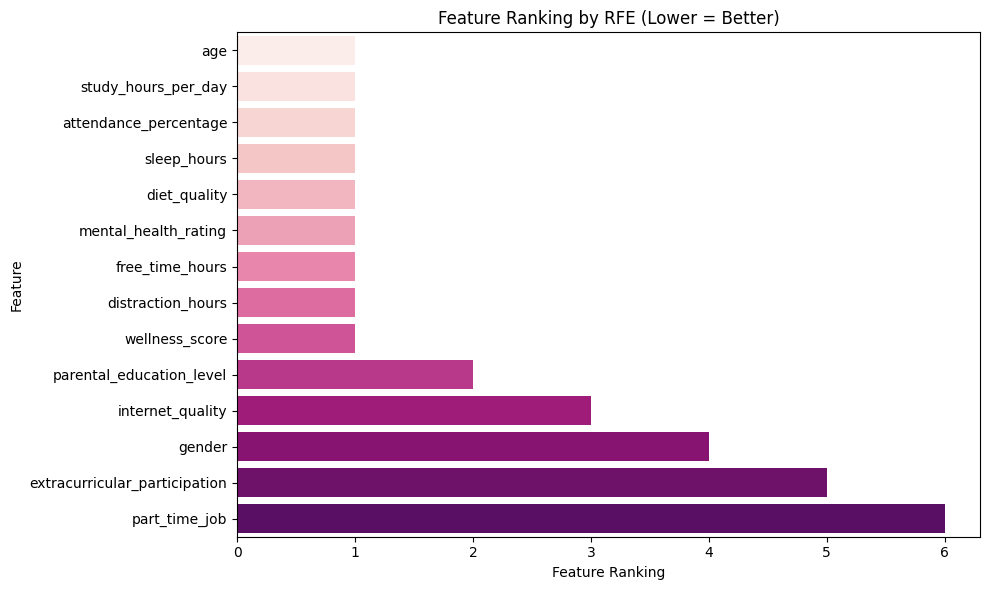

C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\3588255009.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='PuRd')


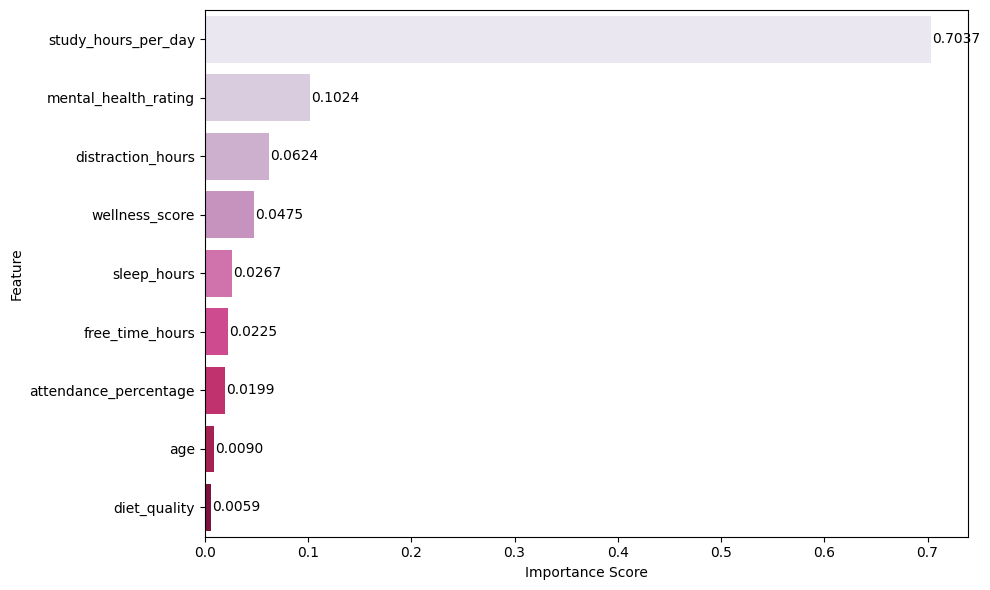

In [23]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE

rf = RandomForestRegressor(random_state=42)
n_features_to_select = 9

#n = 10, lasso, .981348
#n = 9, rf, .981384 - the best r2

rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)
rfe.fit(X, y)

selected_features_mask = rfe.support_
selected_features = [feature for feature, selected in zip(X.columns, selected_features_mask) if selected]

print(f"Selected features ({len(selected_features)}):")
print(selected_features)

feature_importances = rfe.estimator_.feature_importances_

importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# print("\nFeature Importance among selected features:")
# print(importance_df)

ranking_df = pd.DataFrame({'Feature': X.columns, 'Ranking': rfe.ranking_})
ranking_df = ranking_df.sort_values(by='Ranking', ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=ranking_df, palette='RdPu')
plt.title('Feature Ranking by RFE (Lower = Better)')
plt.xlabel('Feature Ranking')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#feature importance plot, od tie selektirani kako se podredeni spored importance
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Importance', y='Feature', data=importance_df, palette='PuRd')
#plt.title('Feature Importance (among selected features)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

#za dodavanje na vrednostite
for i, (importance, feature) in enumerate(zip(importance_df['Importance'], importance_df['Feature'])):
    plt.text(importance + 0.001, i, f'{importance:.4f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()




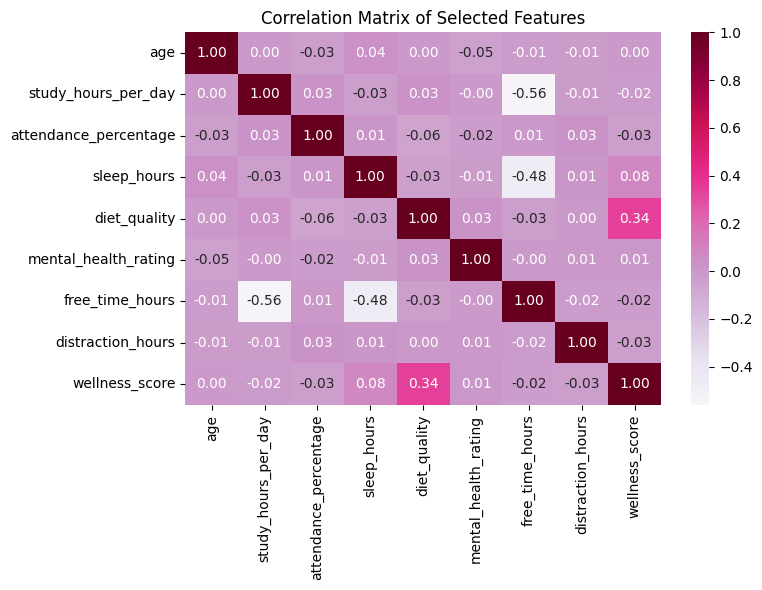

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(X[selected_features].corr(), annot=True, cmap='PuRd', fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.tight_layout()
plt.show()


2. Training the top 6 models with 80/20 split on selected features, but no hyperparameter tuning.. yet

Results on RFE-selected features:



C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\1054678258.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


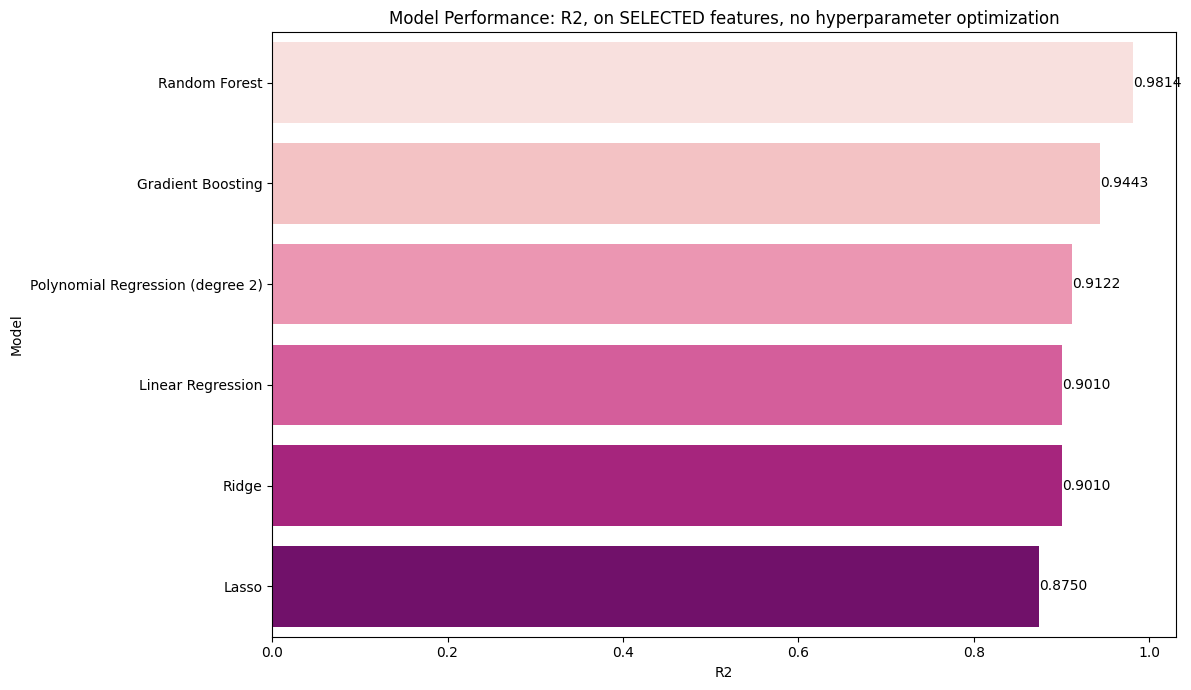

,Model,MAE,MSE,RMSE,R2
0,Random Forest,1.832325,5.302009,2.302609,0.981392
1,Gradient Boosting,3.186794,15.864699,3.983051,0.944322
2,Polynomial Regression (degree 2),3.992822,25.013621,5.001362,0.912214
3,Linear Regression,4.207472,28.206466,5.310976,0.901009
4,Ridge,4.207958,28.206916,5.311018,0.901007
5,Lasso,4.758548,35.609013,5.967329,0.875029


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

top6_models = { 
    "Lasso": Lasso(random_state=42),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Polynomial Regression (degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    #"DummyRegressor": DummyRegressor()
}

X_selected = X[selected_features]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

X_train, y_train = X_selected, y

print("Results on RFE-selected features:\n")

results = []
for name, model in top6_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    mae = mean_absolute_error(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_train, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })


results_selected_no_tuning = pd.DataFrame(results)
results_selected_no_tuning = results_selected_no_tuning.sort_values(by="R2", ascending=False).reset_index(drop=True)

metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_selected_no_tuning.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7)) 
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')

    plt.title(f'Model Performance: {metric}, on SELECTED features, no hyperparameter optimization')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center') 

    plt.tight_layout() 
    plt.show()

results_selected_no_tuning

Hyperparameter optimization with randomized search

In [26]:
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# from sklearn.linear_model import Ridge, Lasso, LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# import pandas as pd

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models = {
#     "Random Forest": {
#         "estimator": RandomForestRegressor(random_state=42),
#         "params": {
#             'n_estimators': [100, 200, 300],
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]
#         }
#     },
#     "Gradient Boosting": {
#         "estimator": GradientBoostingRegressor(random_state=42),
#         "params": {
#             'n_estimators': [100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 7]
#         }
#     },
#     "Polynomial Regression (degree 2)": {
#         "estimator": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#         "params": {}  # no tuning here
#     },
#     "Ridge": {
#         "estimator": Ridge(),
#         "params": {
#             'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
#         }
#     },
#     "Lasso": {
#         "estimator": Lasso(max_iter=10000),
#         "params": {
#             'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]
#         }
#     },
# }

# # tuning on training set
# best_params = {}

# for name, config in models.items():
#     print(f"\nTuning: {name}")
    
#     if config["params"]:
#         search = RandomizedSearchCV(
#             estimator=config["estimator"],
#             param_distributions=config["params"],
#             n_iter=30,
#             scoring='r2',
#             cv=5,
#             random_state=42,
#             n_jobs=-1
#         )
#         search.fit(X_train, y_train)
#         best_params[name] = search.best_params_
#         print(f"Best Parameters: {search.best_params_}")
#     else:
#         best_params[name] = "No hyperparameters to tune"
#         print("No hyperparameters to tune")



3. Training models with 80/20 split using tuned parameters for the models on ALL features.


C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\3947532705.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


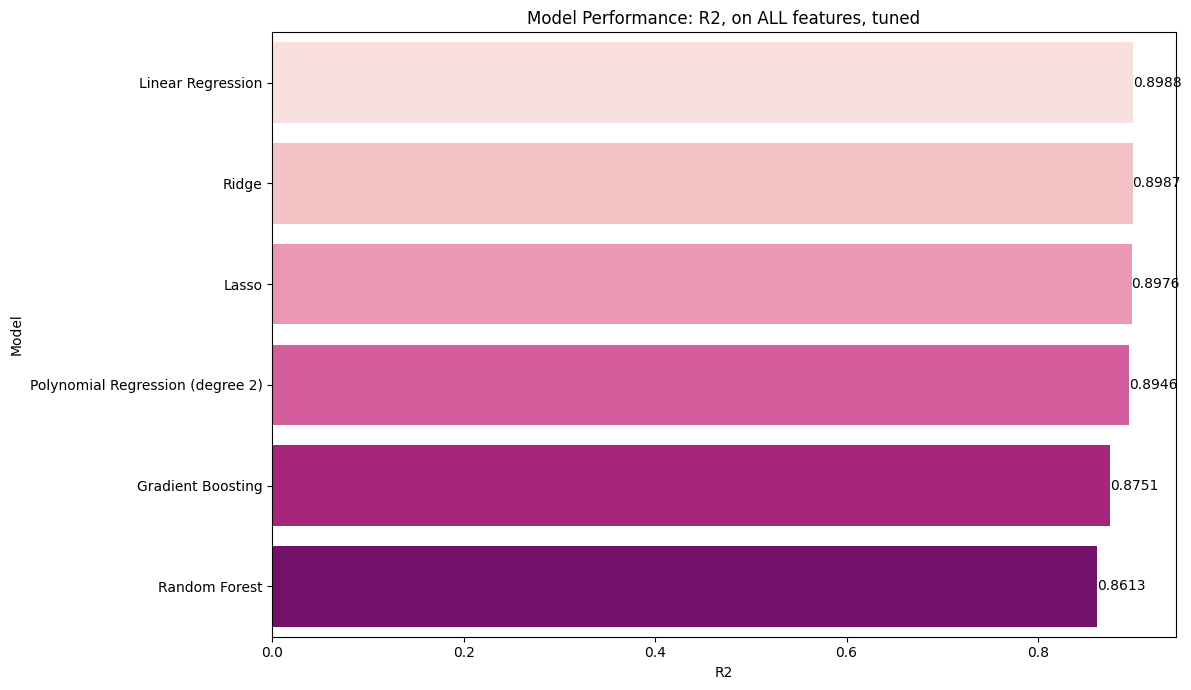

,Model,MAE,MSE,RMSE,R2
0,Linear Regression,4.156600,25.957732,5.094873,0.898772
1,Ridge,4.159674,25.979774,5.097036,0.898686
2,Lasso,4.177284,26.254881,5.123952,0.897613
3,Polynomial Regression (degree 2),4.167764,27.022859,5.198352,0.894619
4,Gradient Boosting,4.703004,32.023535,5.658934,0.875117
5,Random Forest,4.859130,35.558197,5.963069,0.861333


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models_tuned = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=20,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    ),
    "Polynomial Regression (degree 2)": make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
    ),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Linear Regression": LinearRegression(),
    #"DummyRegressor": DummyRegressor()
}

results = []

for name, model in models_tuned.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_all_tuned = pd.DataFrame(results)
results_all_tuned = results_all_tuned.sort_values(by="R2", ascending=False).reset_index(drop=True)

metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_all_tuned.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}, on ALL features, tuned')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center')

    plt.tight_layout() 
    plt.show()

results_all_tuned


4. Training models on selected features with tuned parameters with 80/20 split.

C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\1030795630.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


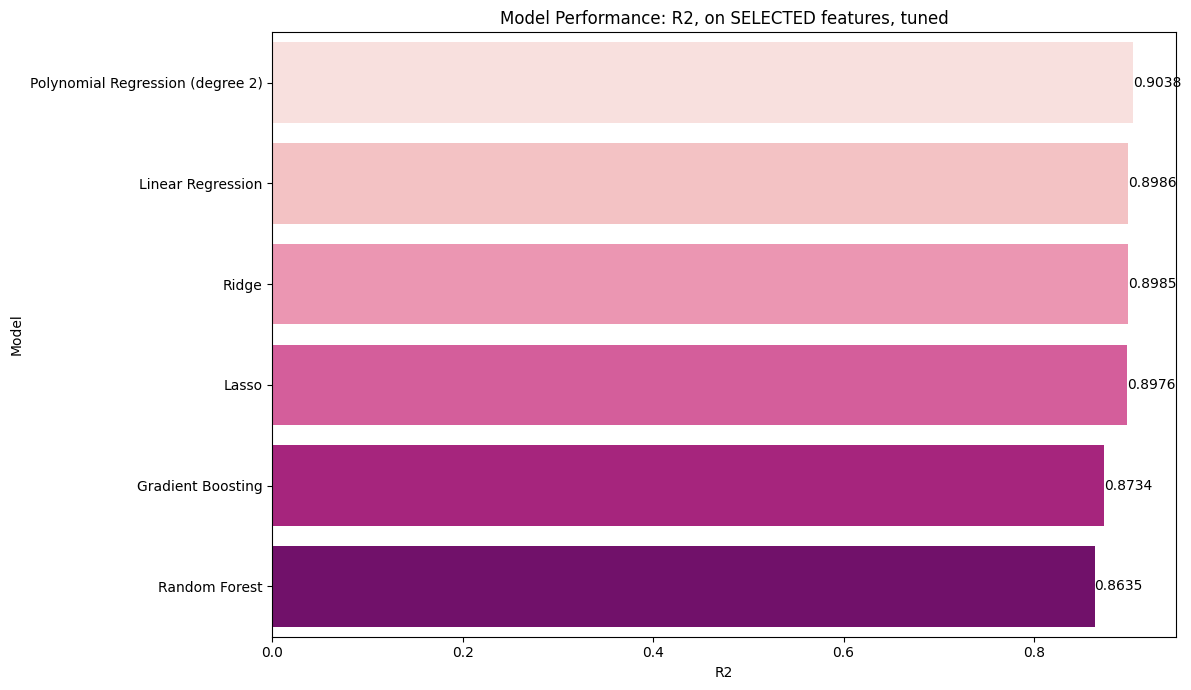

,Model,MAE,MSE,RMSE,R2
0,Polynomial Regression (degree 2),4.109729,24.664102,4.966297,0.903817
1,Linear Regression,4.161461,25.991623,5.098198,0.898640
2,Ridge,4.165452,26.020244,5.101004,0.898529
3,Lasso,4.177283,26.254875,5.123951,0.897614
4,Gradient Boosting,4.741480,32.460248,5.697390,0.873414
5,Random Forest,4.828634,34.989949,5.915230,0.863549


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

models_tuned = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=20,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    ),
    "Polynomial Regression (degree 2)": make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
    ),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Linear Regression": LinearRegression(),
    #"DummyRegressor": DummyRegressor()
}

results = []

for name, model in models_tuned.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    })

results_selected_tuned = pd.DataFrame(results)
results_selected_tuned = results_selected_tuned.sort_values(by="R2", ascending=False).reset_index(drop=True)


metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_selected_tuned.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}, on SELECTED features, tuned')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center') 
        
    plt.tight_layout() 
    plt.show()

results_selected_tuned


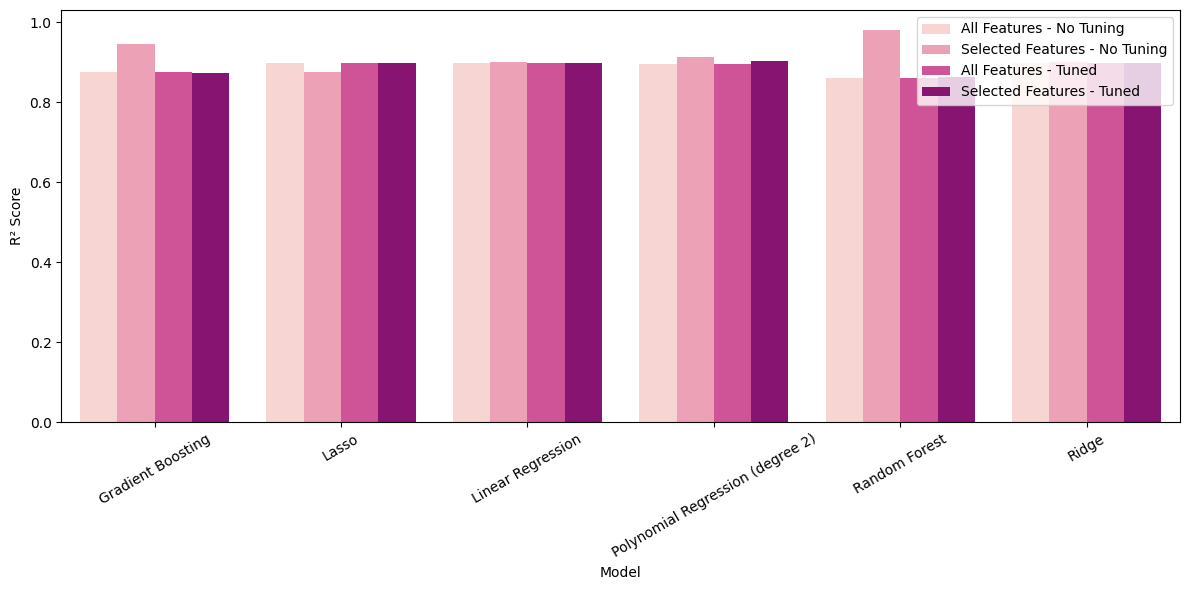

,All Features - No Tuning,Selected Features - No Tuning,All Features - Tuned,Selected Features - Tuned
Model,,,,
Gradient Boosting,0.8751,0.9443,0.8751,0.8734
Lasso,0.8976,0.8750,0.8976,0.8976
Linear Regression,0.8988,0.9010,0.8988,0.8986
Polynomial Regression (degree 2),0.8946,0.9122,0.8946,0.9038
Random Forest,0.8610,0.9814,0.8613,0.8635
Ridge,0.8987,0.9010,0.8987,0.8985


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

r2_all_no_tuning = results_all_no_tuning.set_index('Model')['R2']
r2_selected_no_tuning = results_selected_no_tuning.set_index('Model')['R2']
r2_all_tuned = results_all_tuned.set_index('Model')['R2']
r2_selected_tuned = results_selected_tuned.set_index('Model')['R2']

r2_comparison = pd.DataFrame({
    'All Features - No Tuning': r2_all_no_tuning,
    'Selected Features - No Tuning': r2_selected_no_tuning,
    'All Features - Tuned': r2_all_tuned,
    'Selected Features - Tuned': r2_selected_tuned
}).reset_index()

r2_melted = pd.melt(r2_comparison, id_vars='Model', 
                    var_name='Configuration', value_name='R2')

plt.figure(figsize=(12, 6))
sns.barplot(data=r2_melted, x='Model', y='R2', hue='Configuration', palette='RdPu')

#plt.title("Model R² Scores Using 80/20 Split", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

table_data = r2_comparison.set_index('Model').round(4)
table_data


1. Training the same models and seeing their 5 fold cross validation results

5-Fold Cross-Validation Results:



C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\3383099226.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


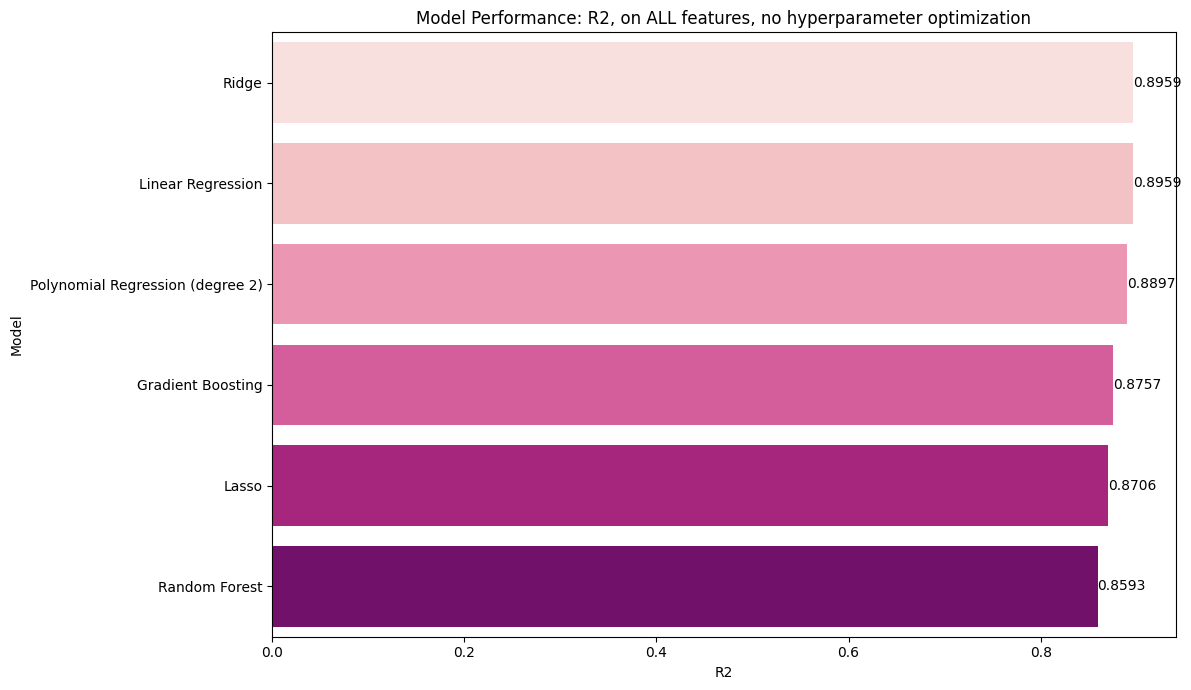

,Model,MAE,MSE,RMSE,R2
1,Ridge,4.294156,29.156771,5.398547,0.895887
0,Linear Regression,4.294009,29.159556,5.398823,0.895873
5,Polynomial Regression (degree 2),4.410260,30.768716,5.543276,0.889699
4,Gradient Boosting,4.730525,34.752177,5.887980,0.875663
2,Lasso,4.813127,36.361852,6.014434,0.870620
3,Random Forest,5.070009,39.373943,6.263047,0.859290


In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

models = {
    #"Dummy": DummyRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    #"Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    #"AdaBoost": AdaBoostRegressor(random_state=42),
    # "XGBoost": XGBRegressor(random_state=42),
    # "SVR": SVR(),
    # "KNN": KNeighborsRegressor(),
    "Polynomial Regression (degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    #"Polynomial Regression (degree 3)": make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
}

results = []
print("5-Fold Cross-Validation Results:\n")
for name, model in models.items():
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)

    results.append({
        "Model": name,
        "MAE": mae_scores.mean(),
        "MSE": mse_scores.mean(),
        "RMSE": rmse_scores.mean(),
        "R2": r2_scores.mean() 
    })

results_all_no_tuning_cv = pd.DataFrame(results)
results_all_no_tuning_cv = results_all_no_tuning_cv.sort_values(by="R2", ascending=False) 
results_all_no_tuning_cv

metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_all_no_tuning_cv.sort_values(by=metric, ascending=ascending_order)

    plt.figure(figsize=(12, 7))
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}, on ALL features, no hyperparameter optimization')
    plt.xlabel(metric)
    plt.ylabel('Model')


    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center')

    plt.tight_layout()
    plt.show()

results_all_no_tuning_cv

2. CV on selected feature, no tuned parameters

5-Fold Cross-Validation Results on RFE-selected features:



C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\219080524.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


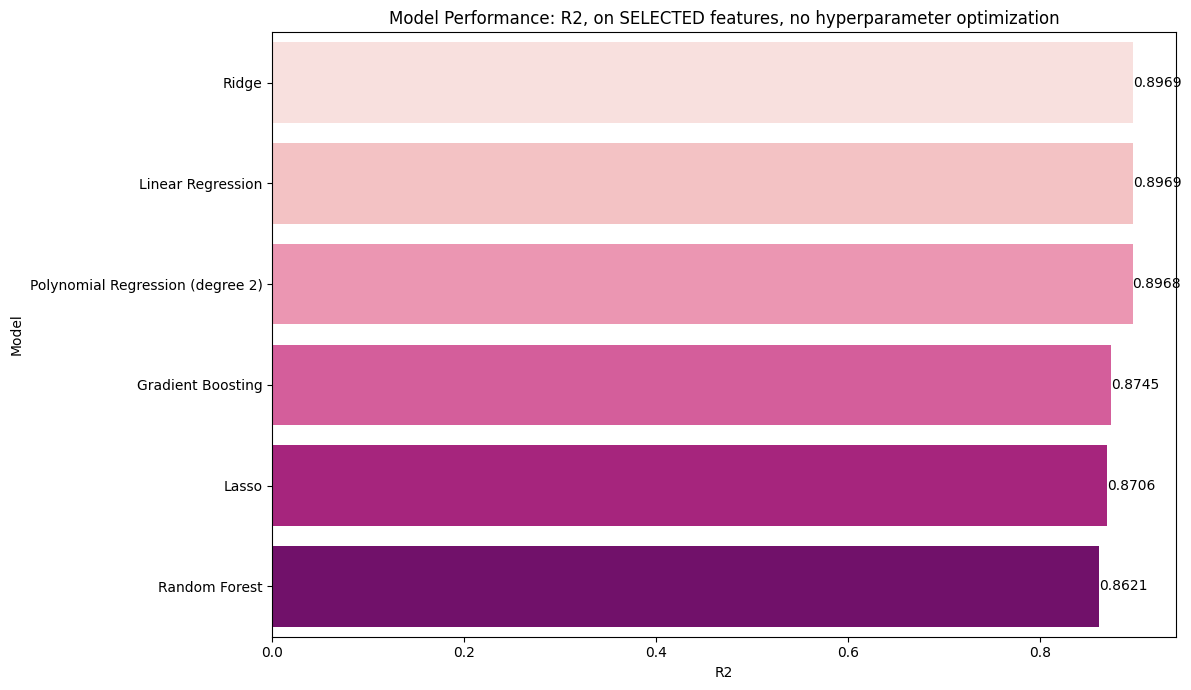

,Model,MAE,MSE,RMSE,R2
0,Ridge,4.262788,28.878688,5.372715,0.896869
1,Linear Regression,4.262348,28.879162,5.372777,0.896865
2,Polynomial Regression (degree 2),4.268408,28.690089,5.350092,0.896840
3,Gradient Boosting,4.738534,34.991538,5.906824,0.874534
4,Lasso,4.813127,36.361852,6.014434,0.870620
5,Random Forest,5.006458,38.592474,6.200855,0.862093


In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

models = {
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Linear Regression": LinearRegression(),
    "Polynomial Regression (degree 2)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    #"Dummy Regressor": DummyRegressor(strategy="mean"),
}

results = []
print("5-Fold Cross-Validation Results on RFE-selected features:\n")
for name, model in models.items():
    r2_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)

    results.append({
        "Model": name,
        "MAE": mae_scores.mean(),
        "MSE": mse_scores.mean(),
        "RMSE": rmse_scores.mean(),
        "R2": r2_scores.mean()
    })


results_selected_no_tuning_cv = pd.DataFrame(results)
results_selected_no_tuning_cv = results_selected_no_tuning_cv.sort_values(by="R2", ascending=False).reset_index(drop=True)

metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_selected_no_tuning_cv.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}, on SELECTED features, no hyperparameter optimization')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center')

    plt.tight_layout()
    plt.show()

results_selected_no_tuning_cv

3. CV results using tuned hyperparameters for the models, testing on all features

5-Fold Cross-Validation Results using Tuned Models:



C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\2628587046.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


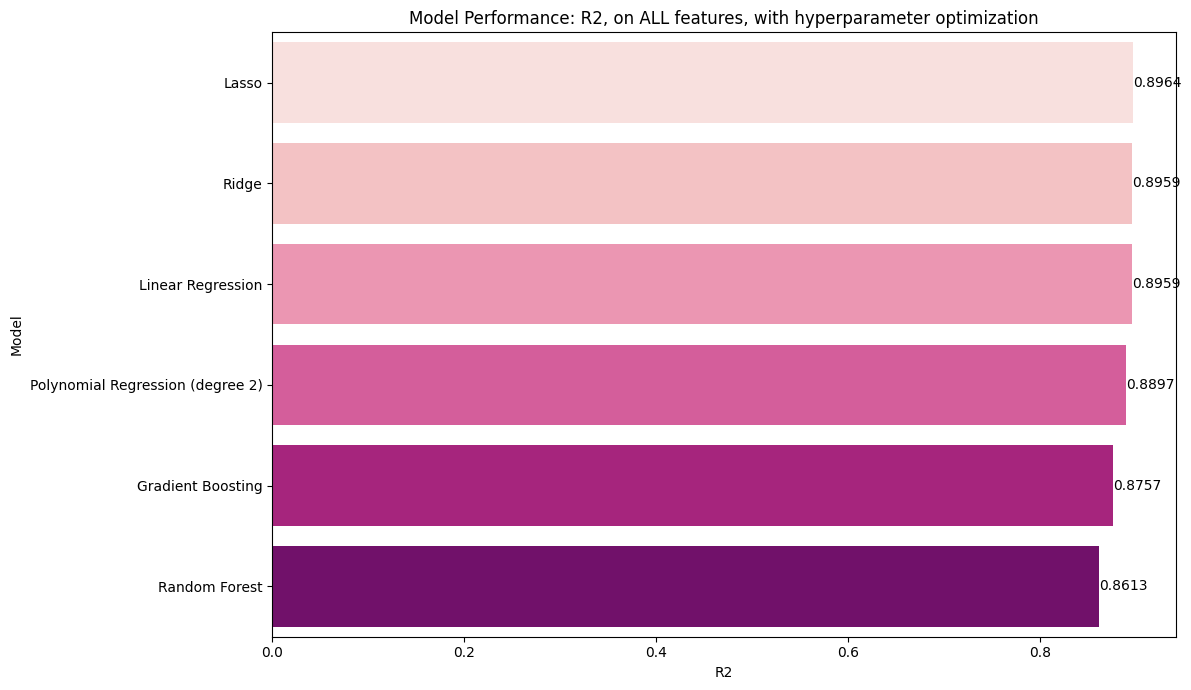

,Model,MAE,MSE,RMSE,R2
0,Lasso,4.276033,29.004148,5.383866,0.896418
1,Ridge,4.294156,29.156771,5.398547,0.895887
2,Linear Regression,4.294009,29.159556,5.398823,0.895873
3,Polynomial Regression (degree 2),4.410260,30.768716,5.543276,0.889699
4,Gradient Boosting,4.730525,34.752177,5.887980,0.875663
5,Random Forest,5.033985,38.795578,6.216807,0.861251


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

models_tuned = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=20,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    ),
    "Polynomial Regression (degree 2)": make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
    ),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Linear Regression": LinearRegression(),
    #"Dummy Regressor": DummyRegressor()
}

results = []
print("5-Fold Cross-Validation Results using Tuned Models:\n")
for name, model in models_tuned.items():
    r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)

    results.append({
        "Model": name,
        "MAE": mae_scores.mean(),
        "MSE": mse_scores.mean(),
        "RMSE": rmse_scores.mean(),
        "R2": r2_scores.mean()
    })

results_all_tuned_cv = pd.DataFrame(results)
results_all_tuned_cv = results_all_tuned_cv.sort_values(by="R2", ascending=False).reset_index(drop=True)


metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_all_tuned_cv.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7))
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}, on ALL features, with hyperparameter optimization')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center') 

    plt.tight_layout() 
    plt.show()
results_all_tuned_cv


4. CV on selected features and tuned hyperparameters on the models

5-Fold Cross-Validation Results using Tuned Models on RFE-selected Features:



C:\Users\Rrezearta\AppData\Local\Temp\ipykernel_12812\398123448.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')


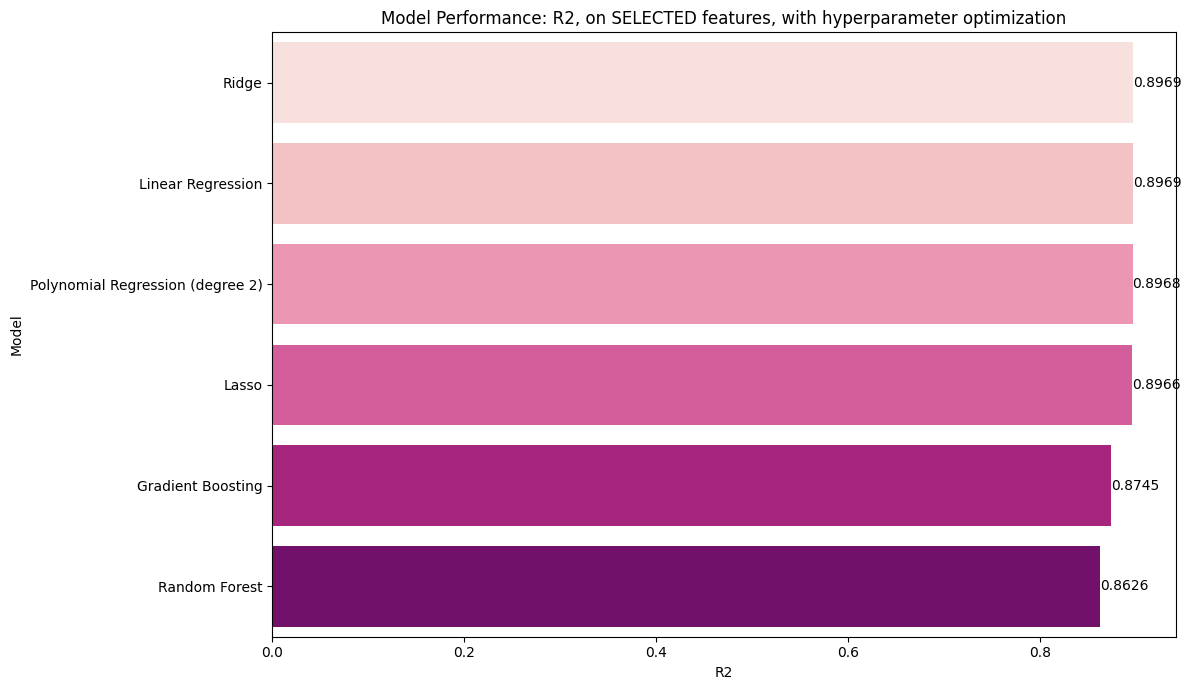

,Model,MAE,MSE,RMSE,R2
0,Ridge,4.262788,28.878688,5.372715,0.896869
1,Linear Regression,4.262348,28.879162,5.372777,0.896865
2,Polynomial Regression (degree 2),4.268408,28.690089,5.350092,0.896840
3,Lasso,4.269542,28.948549,5.378631,0.896609
4,Gradient Boosting,4.738534,34.991538,5.906824,0.874534
5,Random Forest,5.002586,38.413222,6.186872,0.862600


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd

models_tuned = {
    "Random Forest": RandomForestRegressor(
        n_estimators=300,
        min_samples_split=2,
        min_samples_leaf=1,
        max_depth=20,
        random_state=42
    ),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100,
        max_depth=3,
        learning_rate=0.1,
        random_state=42
    ),
    "Polynomial Regression (degree 2)": make_pipeline(
        PolynomialFeatures(degree=2),
        LinearRegression()
    ),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1, max_iter=10000),
    "Linear Regression": LinearRegression(),
    #"Dummy Regressor": DummyRegressor(strategy="mean")
}

results = []
print("5-Fold Cross-Validation Results using Tuned Models on RFE-selected Features:\n")
for name, model in models_tuned.items():
    r2_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
    mae_scores = -cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_absolute_error')
    mse_scores = -cross_val_score(model, X_selected, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(mse_scores)

    results.append({
        "Model": name,
        "MAE": mae_scores.mean(),
        "MSE": mse_scores.mean(),
        "RMSE" : rmse_scores.mean(),
        "R2": r2_scores.mean()
    })

results_selected_tuned_cv = pd.DataFrame(results)
results_selected_tuned_cv = results_selected_tuned_cv.sort_values(by="R2", ascending=False).reset_index(drop=True)


metrics_to_plot = {
    #"MAE": True,
    #"MSE": True,
    #"RMSE": True,
    "R2": False 
}

for metric, ascending_order in metrics_to_plot.items():
    sorted_df = results_selected_tuned_cv.sort_values(by=metric, ascending=ascending_order)
    plt.figure(figsize=(12, 7)) 
    sns.barplot(x=metric, y='Model', data=sorted_df, palette='RdPu')
    plt.title(f'Model Performance: {metric}, on SELECTED features, with hyperparameter optimization')
    plt.xlabel(metric)
    plt.ylabel('Model')

    for index, value in enumerate(sorted_df[metric]):
        plt.text(value, index, f'{value:.4f}', va='center') 

    plt.tight_layout() 
    plt.show()
results_selected_tuned_cv

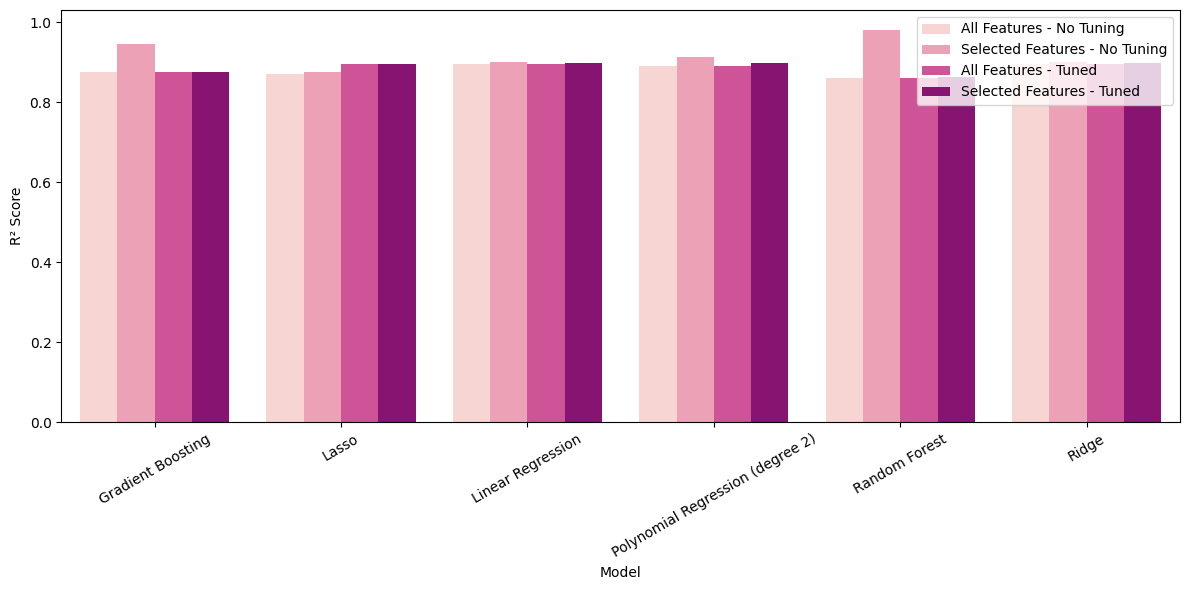

,All Features - No Tuning,Selected Features - No Tuning,All Features - Tuned,Selected Features - Tuned
Model,,,,
Gradient Boosting,0.8757,0.9443,0.8757,0.8745
Lasso,0.8706,0.8750,0.8964,0.8966
Linear Regression,0.8959,0.9010,0.8959,0.8969
Polynomial Regression (degree 2),0.8897,0.9122,0.8897,0.8968
Random Forest,0.8593,0.9814,0.8613,0.8626
Ridge,0.8959,0.9010,0.8959,0.8969


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

results_all_no_tuning = results_all_no_tuning_cv.set_index('Model')['R2']
r2_selected_no_tuning_ = results_selected_no_tuning_cv.set_index('Model')['R2']
r2_all_tuned = results_all_tuned_cv.set_index('Model')['R2']
r2_selected_tuned = results_selected_tuned_cv.set_index('Model')['R2']

r2_comparison = pd.DataFrame({
    'All Features - No Tuning': results_all_no_tuning,
    'Selected Features - No Tuning': r2_selected_no_tuning,
    'All Features - Tuned': r2_all_tuned,
    'Selected Features - Tuned': r2_selected_tuned
}).reset_index()

r2_melted = pd.melt(r2_comparison, id_vars='Model', 
                    var_name='Configuration', value_name='R2')

plt.figure(figsize=(12, 6))
sns.barplot(data=r2_melted, x='Model', y='R2', hue='Configuration', palette='RdPu')

#plt.title("Model R² Scores Using 5 Fold Cross Validation", fontsize=14)
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()

table_data = r2_comparison.set_index('Model').round(4)
table_data

#if it gives the 'Series' object has no attribute 'set_index' error, run '1. Training the same models and seeing their 5 fold cross validation results' again

Trying GridSearch for finding parameters

In [35]:
# from sklearn.model_selection import train_test_split, GridSearchCV 
# from sklearn.linear_model import Ridge, Lasso, LinearRegression
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures
# import pandas as pd

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# models = {
#     "Random Forest": {
#         "estimator": RandomForestRegressor(random_state=42),
#         "params": {
#             'n_estimators': [100, 200, 300],
#             'max_depth': [None, 10, 20, 30],
#             'min_samples_split': [2, 5, 10],
#             'min_samples_leaf': [1, 2, 4]
#         }
#     },
#     "Gradient Boosting": {
#         "estimator": GradientBoostingRegressor(random_state=42),
#         "params": {
#             'n_estimators': [100, 200],
#             'learning_rate': [0.01, 0.1, 0.2],
#             'max_depth': [3, 5, 7]
#         }
#     },
#     "Polynomial Regression (degree 2)": {
#         "estimator": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
#         "params": {}  # no tuning here
#     },
#     "Ridge": {
#         "estimator": Ridge(),
#         "params": {
#             'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
#         }
#     },
#     "Lasso": {
#         "estimator": Lasso(max_iter=10000),
#         "params": {
#             'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0]
#         }
#     },
# }

# # tuning on training set
# best_params = {}

# for name, config in models.items():
#     print(f"\nTuning: {name}")

#     if config["params"]:
#         search = GridSearchCV(
#             estimator=config["estimator"],
#             param_grid=config["params"], 
#             scoring='r2',
#             cv=5,
#             n_jobs=-1
#         )
#         search.fit(X_train, y_train)
#         best_params[name] = search.best_params_
#         print(f"Best Parameters: {search.best_params_}")
#     else:
#         best_params[name] = "No hyperparameters to tune"
#         print("No hyperparameters to tune")
    

# # #results from randomized search to compare
# # # Tuning: Random Forest Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
# # # Tuning: Gradient Boosting Best Parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
# # # Tuning: Ridge Best Parameters: {'alpha': 1.0}
# # # Tuning: Lasso Best Parameters: {'alpha': 0.01}


In [36]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model2 = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
# model2.fit(X_train, y_train)
# y_pred_rf = model2.predict(X_test)
# print(f"Random Forest R2: {r2_score(y_test, y_pred_rf)}") 

# scores = cross_val_score(model2, X, y, cv=5, scoring='r2')
# print(f"Random Forest R2 (Cross Validation): {np.mean(scores)}")